In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from pyproj import Proj, transform

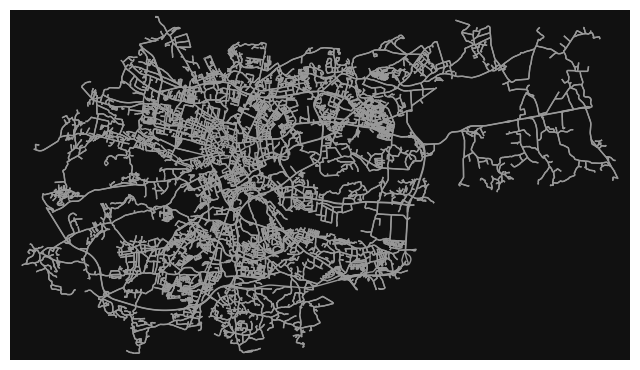

In [2]:
G = ox.load_graphml('ExMAS/data/graphs/Krakow.graphml')
fig, ax = ox.plot_graph(G, node_size=0)

<AxesSubplot: >

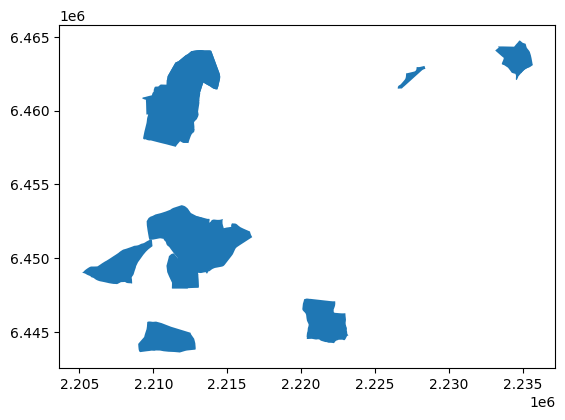

In [3]:
import geopandas as gpd

# Replace 'name.shp' with the actual name of your shapefile
shapefile_path = 'Obszary_SUM.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Extract the geometries
geometries = gdf['geometry']
gdf.plot()
# plt.savefig('KRK_areas.jpg', dpi=100)

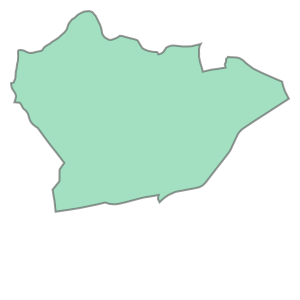

In [4]:
geometries[1]

In [6]:
# Combine those two polygon

polygon1 = gdf['geometry'].iloc[1]
polygon2 = gdf['geometry'].iloc[6]

polygon = polygon1

In [7]:
# check the center of the polygon

xx = polygon.exterior.coords.xy[0]
x_center = sum(xx) / len(xx)

yy = polygon.exterior.coords.xy[1]
y_center = sum(yy) / len(yy)

print(x_center,',', y_center)

2213229.3862197585 , 6451553.662378783


C:\Users\shuli\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\shuli\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\shuli\AppData\Local\Temp\ipykernel_16648\1321437576.py:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = tr

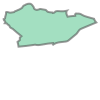

In [8]:
# Conver the CRS

source_crs = Proj(init='epsg:3857')
target_crs = Proj(init='epsg:4326')

x, y = polygon.exterior.xy
lon, lat = transform(source_crs, target_crs, x, y)

converted_polygon = Polygon(zip(lon, lat))
converted_polygon

In [9]:
# check the center

xx = converted_polygon.exterior.coords.xy[0]
x_center = sum(xx) / len(x)

yy = converted_polygon.exterior.coords.xy[1]
y_center = sum(yy) / len(yy)

print(x_center,',', y_center)

19.881777849036784 , 50.03046525300101


In [10]:
# example to check if the a point is inside a polygon

point = Point(x_center, y_center)
converted_polygon.contains(point)

True

In [11]:
# all locations

df = pd.read_csv('demografia_KRK.csv')
df

,FID,x,y,adr_pelny,ogolem
0,0,19.996604,50.086510,STANISŁAWA SKARŻYŃSKIEGO 9,975
1,1,20.014369,50.083876,OSIEDLE KOŚCIUSZKOWSKIE 6,955
2,2,19.997005,50.085446,STANISŁAWA SKARŻYŃSKIEGO 5,832
3,3,20.021469,50.086969,OSIEDLE KAZIMIERZOWSKIE 29,785
4,4,19.996731,50.084792,STANISŁAWA SKARŻYŃSKIEGO 3,775
...,...,...,...,...,...
47705,47705,19.978465,50.072244,OSTATNIA 27,1
47706,47706,19.954666,50.057313,KAROLA CHODKIEWICZA 10C,1
47707,47707,19.879556,50.085813,WŁODZIMIERZA TETMAJERA 17A,1
47708,47708,20.008240,50.071772,POLESKA 12A,1


In [12]:
# add another column to the df: True means the location is inside the target polygon and False means is not.

df['inside_polygon'] = df.apply(lambda row: True if converted_polygon.contains(Point(row.x, row.y)) else False, axis=1)

In [13]:
# now filter the points which are inside the polygon

dfP = df[df.inside_polygon==True]
dfP.head(5)

,FID,x,y,adr_pelny,ogolem,inside_polygon
3576,3576,19.900636,50.032860,SODOWA 19,54,True
3578,3578,19.894259,50.031829,ZAKRZOWIECKA 39K,54,True
4084,4084,19.895707,50.030716,ZAKRZOWIECKA 53,45,True
4193,4193,19.901048,50.032958,SODOWA 17,43,True
4250,4250,19.893706,50.033514,GABRIELA SŁOŃSKIEGO 15,42,True


In [14]:
# dfP.to_csv("polygon10.csv")